# Question 04

### Follow along with in-line comments for discourse of why certain code is formatted in specific ways

In [87]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import operator
%matplotlib inline

In [2]:
#first import the data sets
city_temp = pd.read_csv("/Users/pkouvari/Dropbox/SMU/6306_dds/case study 2/CityTemp.csv")
temp = pd.read_csv("/Users/pkouvari/Dropbox/SMU/6306_dds/case study 2/TEMP.csv")

In [11]:
#check shape
temp.head()

,Date,Monthly AverageTemp,Monthly AverageTemp Uncertainty,Country
0,1838-04-01,13.008,2.586,Afghanistan
1,1838-05-01,NaN,NaN,Afghanistan
2,1838-06-01,23.950,2.510,Afghanistan
3,1838-07-01,26.877,2.883,Afghanistan
4,1838-08-01,24.938,2.992,Afghanistan


In [172]:
#the 'Date' column are not datetime objects, we can use to_datetime() but it will take a bit of time
print("Converting " + str(len(temp['Date']))+ " values to type datetime. This may take a few minutes.")
temp['Date'] = pd.to_datetime(temp['Date']) 
print("Converstion completed.")

Converting 574223 values to type datetime. This may take a few minutes.
Converstion completed.


## Part (i)

In [74]:
#(i)
#store the data for each country in a library where key value is country name followed by a tuple
#of (maximum, minimum, difference)
values = {}
i_df = temp[temp['Date'] > datetime.datetime(1900,1,1)]
unique_countries = temp['Country'].unique()
for country in unique_countries:
    current_country = i_df[i_df['Country'] == country]
    maxi = max(current_country['Monthly AverageTemp'])
    mini = min(current_country['Monthly AverageTemp'])
    val_tuple = (maxi, mini, (maxi-mini))
    values[country] = val_tuple
#take the difference value point and store in simpler structured dict that will be sortable
#using operator library
for_max = {}
for country in values.keys():
    for_max[country] = values[country][2]
#change the dictionary into a list with tuples and save the top 20 to a list called "top_20"
sorted_x = sorted(for_max.items(), key=operator.itemgetter(1))
top_20 = sorted_x[-20:]

In [119]:
#We can see the largest differences list in the dataframe below
top_20_df = pd.DataFrame(top_20)
top_20_df

,0,1
0,Saudi Arabia,23.736
1,Tunisia,25.111
2,San Marino,27.537
3,Svalbard And Jan Mayen,28.676
4,Saint Pierre And Miquelon,29.433
5,United States,29.745
6,Switzerland,29.895
7,Turkey,30.220
8,Syria,30.378
9,Slovenia,31.179


(array([  0. ,   2.5,   5. ,   7.5,  10. ,  12.5,  15. ,  17.5,  20. ]),
 <a list of 9 Text xticklabel objects>)

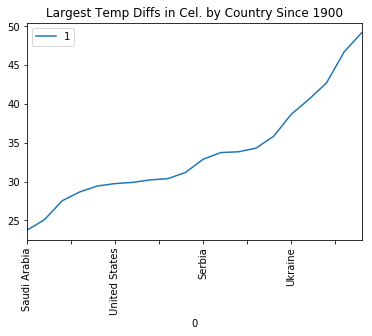

In [173]:
#And plot to get an idea of how the max countries compare
top_20_df.plot(x = 0, y = 1, title = "Largest Temp Diffs in Cel. by Country Since 1900")
plt.xticks(rotation=90, fontsize=10)

## Part (ii)

In [45]:
##(ii)
#subset it first
df_1990 = temp[temp['Date'] >= datetime.datetime(1990,1,1)]
UStemp = df_1990[df_1990['Country'] == "United States"]

#(ii)(a)
def conversion(cel):
    return(cel * 1.8 + 32)

UStemp['AvgTemp Fahrenheit'] = UStemp['Monthly AverageTemp'].apply(lambda x: conversion(x))

In [75]:
#we can see our new column here
UStemp.head()

,Date,Monthly AverageTemp,Monthly AverageTemp Uncertainty,Country,AvgTemp Fahrenheit
554297,1990-01-01,-1.123,0.195,United States,29.9786
554298,1990-02-01,-1.747,0.107,United States,28.8554
554299,1990-03-01,4.465,0.240,United States,40.0370
554300,1990-04-01,9.380,0.080,United States,48.8840
554301,1990-05-01,13.772,0.112,United States,56.7896


In [85]:
#(ii)(b)
#lets create a year column so we can use simple code 
#oddly, you dont need to call .year() but can use .year
UStemp['Year'] = UStemp['Date'].apply(lambda x: x.year)


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [89]:
year_temps = {}
for year in UStemp['Year'].unique():
    curr_year = UStemp[UStemp['Year'] == year]
    yearly_average = np.mean(curr_year['AvgTemp Fahrenheit'])
    year_temps[year] = yearly_average

In [120]:
#the raw data
year_temps

{1990: 49.13884999999999,
 1991: 49.08859999999999,
 1992: 48.3014,
 1993: 47.96105000000001,
 1994: 48.6866,
 1995: 48.79579999999999,
 1996: 47.7578,
 1997: 48.51125,
 1998: 50.254099999999994,
 1999: 49.22059999999999,
 2000: 49.36955000000001,
 2001: 49.61405,
 2002: 49.66909999999999,
 2003: 49.559149999999995,
 2004: 49.401500000000006,
 2005: 49.8068,
 2006: 49.95409999999999,
 2007: 49.70750000000001,
 2008: 48.112550000000006,
 2009: 48.44674999999999,
 2010: 49.11005,
 2011: 49.18985,
 2012: 50.469950000000004,
 2013: 52.3348}

([<matplotlib.axis.XTick at 0x122c01940>,
 <a list of 24 Text xticklabel objects>)

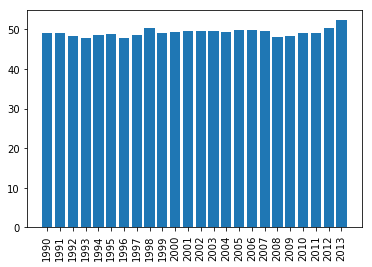

In [104]:
#a Bar Plot showing the average temps
plt.bar(range(len(year_temps)), year_temps.values(), align='center')
plt.xticks(range(len(year_temps)), year_temps.keys(),rotation=90, fontsize=10)

In [124]:
## we want the difference between the year and the one after, so we can use the dictionary "year_temps"
## we used in the above code
## (ii)(c)
year_to_year = {}
for x in range(1990,2013):
    curr_year = year_temps[x]
    next_year = year_temps[x+1]
    diff = curr_year - next_year
    year_to_year[x] = diff

In [125]:
year_to_year

{1990: 0.05024999999999835,
 1991: 0.7871999999999915,
 1992: 0.3403499999999937,
 1993: -0.7255499999999913,
 1994: -0.10919999999999419,
 1995: 1.0379999999999896,
 1996: -0.7534499999999937,
 1997: -1.7428499999999971,
 1998: 1.0335000000000036,
 1999: -0.14895000000002057,
 2000: -0.24449999999998795,
 2001: -0.05504999999999427,
 2002: 0.10994999999999777,
 2003: 0.15764999999998963,
 2004: -0.4052999999999969,
 2005: -0.1472999999999871,
 2006: 0.2465999999999795,
 2007: 1.5949500000000043,
 2008: -0.3341999999999814,
 2009: -0.6633000000000138,
 2010: -0.07979999999999876,
 2011: -1.2801000000000045,
 2012: -1.864849999999997}

In [174]:
#this code can be confusing, but is making a list out of the dictionary keys, then applying abs() function
#using map, because abs() only works on one item at a time
max(map(abs, list(year_to_year.values())))
#we see this difference was in 2012 -> 2013

1.864849999999997

## Part (iii)

In [156]:
#(iii)
#convert and parse dates
#the 'Date' column are not datetime objects, we can use to_datetime() but it will take a bit of time
print("Converting " + str(len(city_temp['Date']))+ " values to type datetime. This may take a few minutes.")
city_temp['Date'] = pd.to_datetime(city_temp['Date']) 
print("Converstion completed.")
city_1900 = city_temp[city_temp['Date'] >= datetime.datetime(1900,1,1)]

Converting 237200 values to type datetime. This may take a few minutes.
Converstion completed.


In [157]:
#check shape
city_1900.head()

,Date,Monthly AverageTemp,Monthly AverageTemp Uncertainty,City,Country,Latitude,Longitude
600,1900-01-01,17.019,1.073,Addis Abeba,Ethiopia,8.84N,38.11E
601,1900-02-01,18.153,0.772,Addis Abeba,Ethiopia,8.84N,38.11E
602,1900-03-01,19.110,0.954,Addis Abeba,Ethiopia,8.84N,38.11E
603,1900-04-01,19.492,0.887,Addis Abeba,Ethiopia,8.84N,38.11E
604,1900-05-01,18.353,2.247,Addis Abeba,Ethiopia,8.84N,38.11E


In [161]:
#(iv)
#store the data for each country in a library where key value is country name followed by a tuple
#of (maximum, minimum, difference)
values_2 = {}
unique_cities = city_1900['City'].unique()
for city in unique_cities:
    current_city = city_1900[city_1900['City'] == city]
    maxi = max(current_city['Monthly AverageTemp'])
    mini = min(current_city['Monthly AverageTemp'])
    val_tuple = (maxi, mini, (maxi-mini))
    values_2[city] = val_tuple
#take the difference value point and store in simpler structured dict that will be sortable
#using operator library
for_max_diff = {}
for city in values_2.keys():
    for_max_diff[city] = values_2[city][2]
#change the dictionary into a list with tuples and save the top 20 to a list called "top_20"
sorted_items = sorted(for_max_diff.items(), key=operator.itemgetter(1))
top_20_2 = sorted_items[-20:]

In [165]:
top_20_2_df = pd.DataFrame(top_20_2)
top_20_2_df

,0,1
0,Jinan,33.778
1,Berlin,33.920
2,Baghdad,34.047
3,New York,34.460
4,Tangshan,34.833
5,Chicago,34.962
6,Dalian,35.223
7,Mashhad,35.610
8,Seoul,35.783
9,Peking,36.953


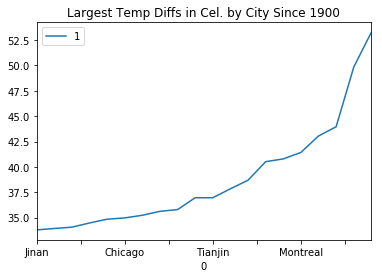

In [175]:
top_20_2_df.plot(x = 0, y = 1, title = "Largest Temp Diffs in Cel. by City Since 1900")


## Part (iv)

####  The steeper increase in city temperature is perhaps due to a rapid change in the industrialization of some of these Chinese cities in the last 2 decades which have increased pollution due to increased production.

(array([  0. ,   2.5,   5. ,   7.5,  10. ,  12.5,  15. ,  17.5,  20. ]),
 <a list of 9 Text xticklabel objects>)

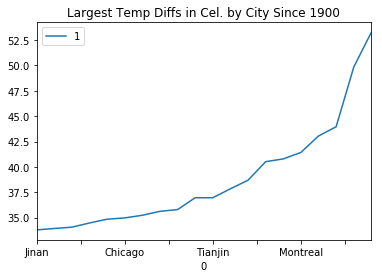

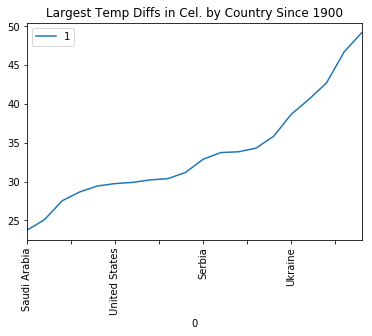

In [171]:
#(iv) Reviewing them Both
top_20_2_df.plot(x = 0, y = 1, title = "Largest Temp Diffs in Cel. by City Since 1900")
top_20_df.plot(x = 0, y = 1, title = "Largest Temp Diffs in Cel. by Country Since 1900")

plt.xticks(rotation=90, fontsize=10)
#the steeper increase in city temperature is perhaps due to a rapid change in the industrialization of some of
#these Chinese cities in the last 2 decades which have increased pollution due to increased production.
